### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [211]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [212]:
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [213]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['New_Price'],axis=1, inplace=True)

In [214]:
#컬럼명변경
data.columns = ['name', 'location', 'year','kilo', 'fuel','transmission','owner', 'mileage','engine','power','seats','price']
data.columns

Index(['name', 'location', 'year', 'kilo', 'fuel', 'transmission', 'owner',
       'mileage', 'engine', 'power', 'seats', 'price'],
      dtype='object')

In [215]:
df = data
df.isnull().sum()

name             0
location         0
year             0
kilo             0
fuel             0
transmission     0
owner            0
mileage          2
engine          36
power           36
seats           42
price            0
dtype: int64

new price는 결측치 많아서 컬럼 삭제,

mileage, engine, power 는 평균치로 대체

seats는 최빈값으로 대체

#### 연속형 변수 전처리

In [217]:
#mileage 뒤 문자열 제거
df["mileage"] = df["mileage"].str.replace('kmpl', '')
df["mileage"] = df["mileage"].str.replace('km/kg', '')
df["engine"] = df["engine"].str.replace('CC', '')
df["power"] = df["power"].str.replace('bhp', '')

In [218]:
df["power"] = df["power"].str.replace('\\D', '', regex=True)

In [221]:
df["mileage"] = pd.to_numeric(df["mileage"])
df["engine"] = pd.to_numeric(df["engine"])
df["power"] = pd.to_numeric(df["power"])
df_mep_int = df

In [227]:
mm = df['mileage'].mean()
em = df['engine'].mean()
pm = df['power'].mean()

In [229]:
# 마일리지, 엔진 , 파워 , 시트 결측치 처리
df['mileage'] = df['mileage'].fillna(mm)
df['engine'] = df['engine'].fillna(em)
df['power'] = df['power'].fillna(pm)

In [232]:
# seats는 최빈값으로 대체
most_freq = df['seats'].value_counts()
df['seats'] = df['seats'].fillna(5)

In [235]:
df_cont = df

#### 범주형 변수 처리

In [187]:
df

,name,location,year,kilo,fuel,transmission,owner,mileage,engine,power,seats,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,5816.0,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,1262.0,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,887.0,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,8876.0,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,1408.0,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248.0,74.0,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120.0,71.0,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498.0,112.0,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998.0,671.0,5.0,2.65


In [236]:
#name 제외
df.drop(['name'], axis=1, inplace=True)
inter_col = ['location', 'fuel', 'transmission','owner']
df = pd.get_dummies(df, columns=['location', 'fuel', 'transmission','owner'])

In [238]:
df_inter_cont = df

앞의 과정은 아래와 같다.
- mileage, engine, power 의 문자열을 제거하고 데이터타입을 숫자로 만드는 과정
- 결측이 있는 mileage, engine, power, seat을 앞 세 변수는 평균으로 대체
- seat은 최빈값으로 대체

(전처리 완료된 데이터를 따로 저장해두었다.)

***
연속형 변수의 pairplot

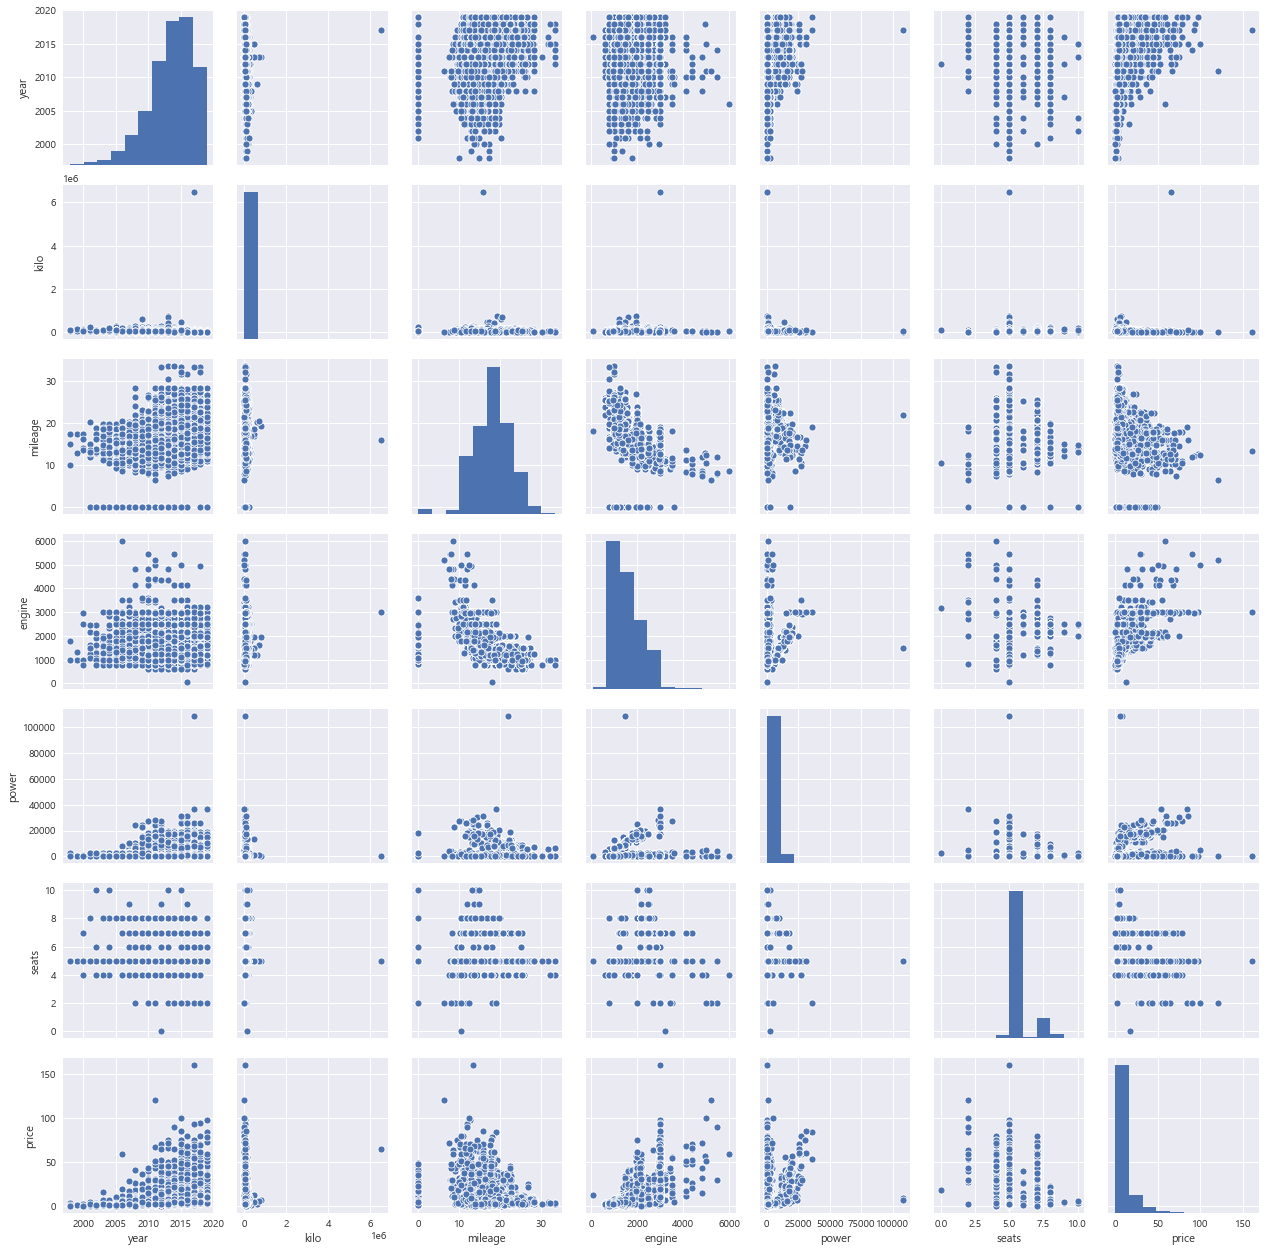

In [242]:
count_col = ['year','kilo','mileage','engine','power','seats','price']
sns.pairplot(data[count_col])

#### log 변환(kilo, power, enginge, price, year)

In [307]:
comp = pd.read_csv('complete_df.csv')

In [308]:
df = pd.read_csv('complete_df.csv')
df['kilo'] = np.log(df['kilo'])
df['power'] = np.log(df['power'])
df['engine'] = np.log(df['engine'])
df['price'] = np.log(df['price'])
df['year'] = np.log(df['year'])

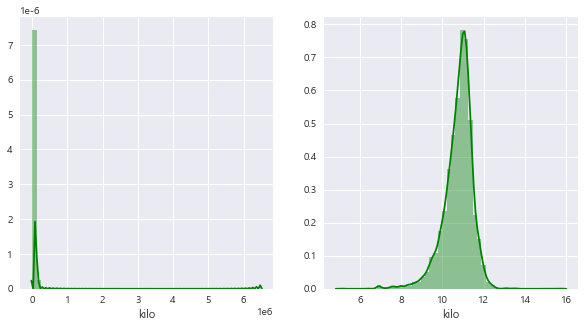

In [309]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(comp['kilo'], ax=axes[0], color="g")
sns.distplot(df['kilo'], ax=axes[1], color="g")
plt.show()

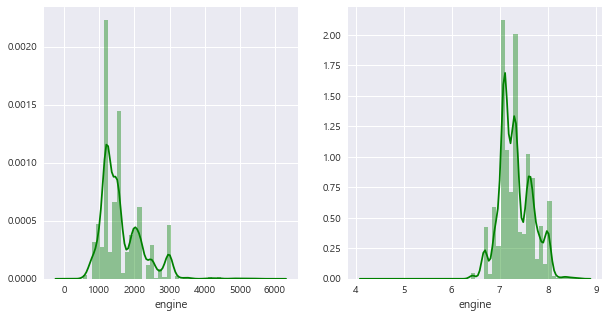

In [310]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(comp['engine'], ax=axes[0], color="g")
sns.distplot(df['engine'], ax=axes[1], color="g")
plt.show()

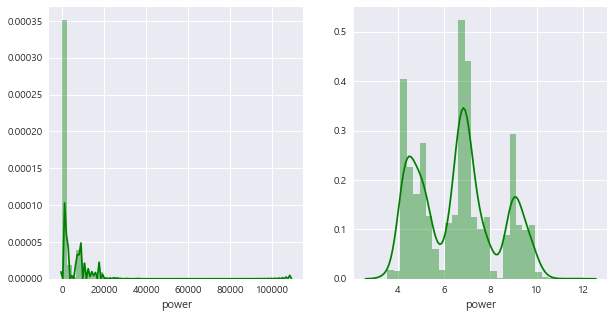

In [311]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(comp['power'], ax=axes[0], color="g")
sns.distplot(df['power'], ax=axes[1], color="g")
plt.show()

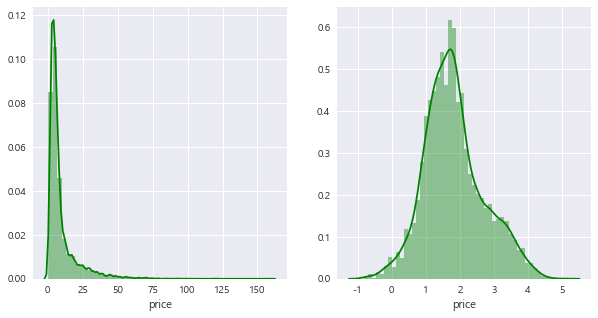

In [312]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(comp['price'], ax=axes[0], color="g")
sns.distplot(df['price'], ax=axes[1], color="g")
plt.show()

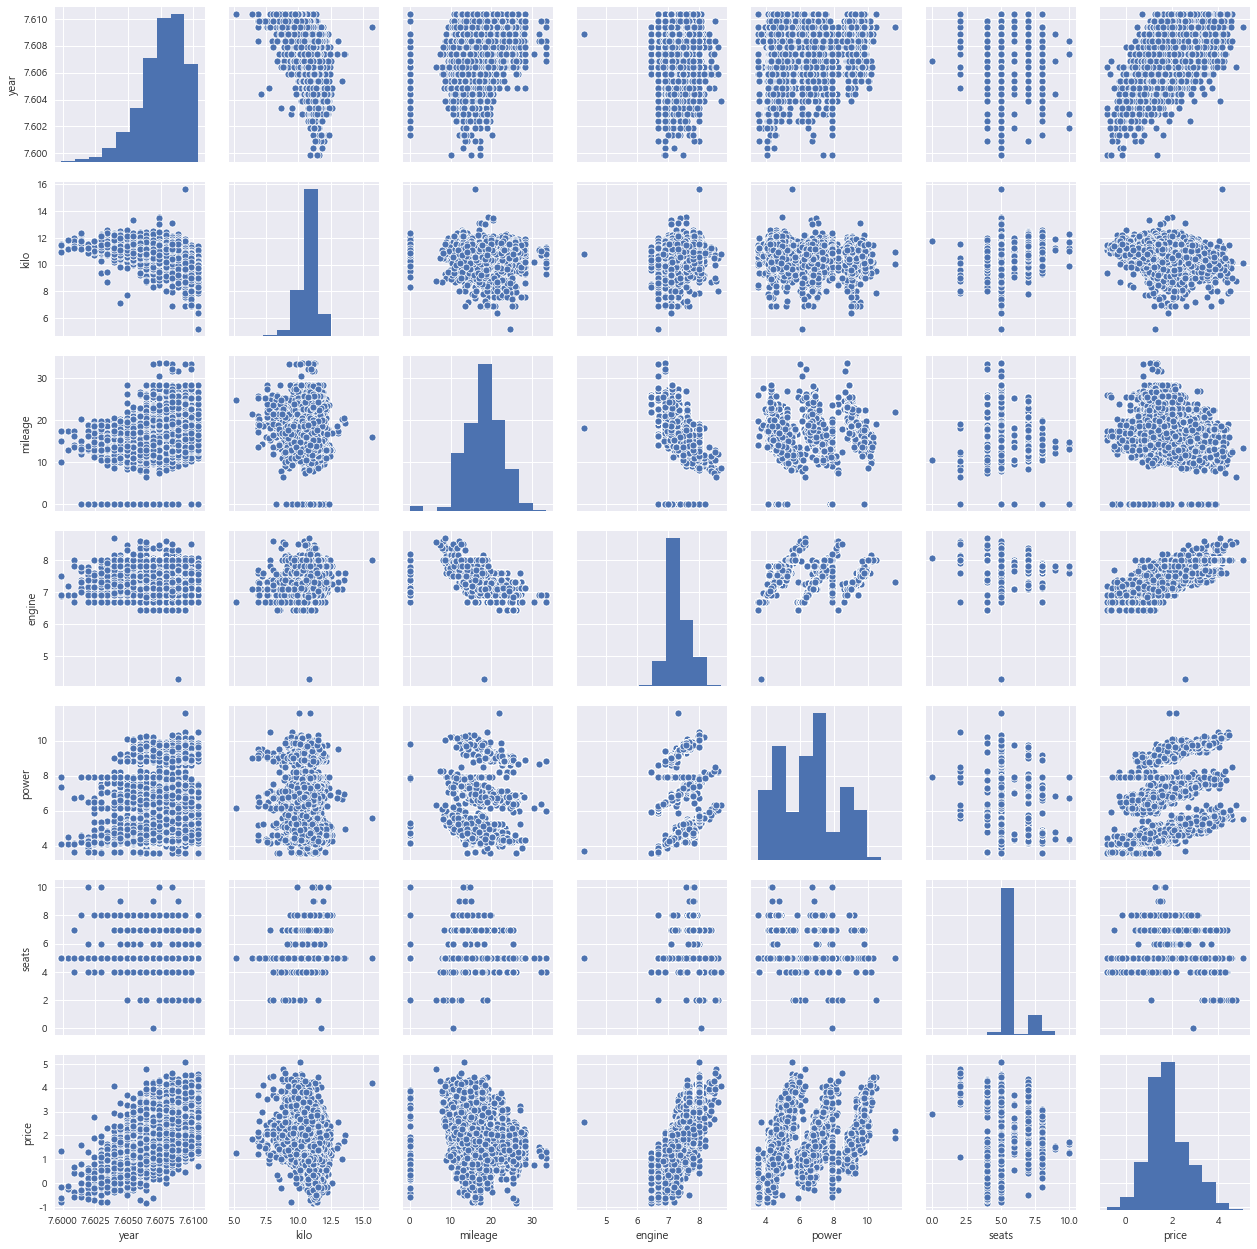

In [313]:
count_col = ['year','kilo','mileage','engine','power','seats','price']
sns.pairplot(df[count_col])

회귀분석의 전제조건인 선형성을 어느정도 만족하는 모습을 볼 수 있다.

In [314]:
df.to_csv('comp_log.csv', index=False)

### vif

In [315]:
y = df['price']
X = df.drop(['price'], axis=1)

In [316]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
14,inf,location_Kolkata
15,inf,location_Mumbai
26,inf,owner_Second
25,inf,owner_Fourth & Above
24,inf,owner_First
23,inf,transmission_Manual
22,inf,transmission_Automatic
21,inf,fuel_Petrol
20,inf,fuel_LPG
19,inf,fuel_Electric


분포도에서 보았듯 강한 다중공선성을 보이는 변수는 없어 보인다.

# Linear Regression

In [317]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [318]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [319]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
# predict
pred = model.predict(X_train)

In [321]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.8607629198936552

In [322]:
mean_squared_error(y_train, pred)

0.10624587665276396

In [323]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[ 2.36447934e+02 -9.88259658e-02 -6.70911695e-03  1.42460734e+00
  1.55413702e-02 -8.39880131e-02  2.60922123e-02  2.05673033e-01
  2.35438538e-02  1.18940022e-01 -3.39890381e-02  1.16433324e-01
 -7.32489990e-02 -9.79291358e-03 -2.41689129e-01 -5.99985260e-02
 -7.19638401e-02 -1.02512818e-01  1.81518138e-02  4.13060621e-01
 -1.38631067e-01 -1.90068550e-01  2.29019823e-01 -2.29019823e-01
  5.16024398e-02  5.27232067e-02 -1.51175646e-02 -8.92080819e-02]
-1805.7477820585837


In [324]:
# test data R-square
model.score(X_test, y_test)

0.8328863821365992

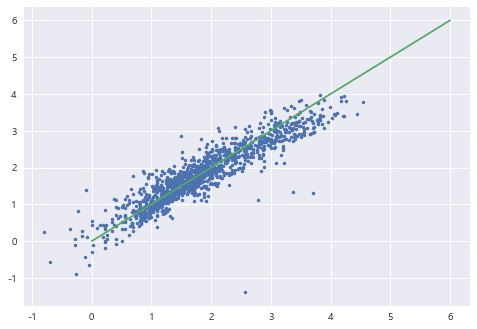

In [325]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 6, 2)
y = x
plt.plot(x, y)
plt.show()

R-squared: 0.83으로, 회귀모형의 성능이 높은 편임을 볼 수 있다.

In [326]:
y = df[['price']]
X = df.drop(['price'], axis=1)
y.shape

(6019, 1)

In [327]:
import statsmodels.api as sm

In [328]:
df.describe()

,year,kilo,mileage,engine,power,seats,price,location_Ahmedabad,location_Bangalore,location_Chennai,...,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth & Above,owner_Second,owner_Third
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,...,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,7.607558,10.758780,18.134961,7.331219,6.591079,5.276790,1.825095,0.037215,0.059478,0.082073,...,0.532480,0.000332,0.001661,0.456222,0.285762,0.714238,0.818907,0.001495,0.160824,0.018774
std,0.001625,0.715788,4.581528,0.339303,1.702638,0.806346,0.874059,0.189305,0.236537,0.274499,...,0.498985,0.018227,0.040730,0.498121,0.451814,0.451814,0.385127,0.038643,0.367399,0.135737
min,7.599902,5.141664,0.000000,4.276666,3.555348,0.000000,-0.820981,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.606387,10.434116,15.170000,7.088409,4.941642,5.000000,1.252763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,7.607878,10.878047,18.150000,7.308543,6.754604,5.000000,1.729884,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,7.608871,11.198215,21.100000,7.585281,7.537430,5.000000,2.297573,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,7.610358,15.687313,33.540000,8.699181,11.594459,10.000000,5.075174,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [331]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1499.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:38:01   Log-Likelihood:                -1873.7
No. Observations:                6019   AIC:                             3797.
Df Residuals:                    5994   BIC:                             3965.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
year                     236

In [330]:
count_col = ['year','kilo','mileage','engine','power','seats']
model = sm.OLS(y, X[count_col])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                          1.334e+04
Date:                Wed, 03 Feb 2021   Prob (F-statistic):                        0.00
Time:                        17:36:04   Log-Likelihood:                         -4775.4
No. Observations:                6019   AIC:                                      9563.
Df Residuals:                    6013   BIC:                                      9603.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

위는 연속형변수로만 구성하여 회귀분석을 한 결과이다.
- R-squared는 0.93 으로 매우 높다.
- F-statistic는 1.334e+04 으로 유위한 모형이다.
- Durbin-Watson 은 2에 가까우므로 오차항의 독립성을 만족한다고 볼 수 있다.